In [1]:
pip install ucimlrepo

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
# code taken from UCI
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [8]:
# Fetch heart disease dataset
heart_disease_data = fetch_ucirepo(id=45)


In [9]:
# Extract features and targets
X = heart_disease_data.data.features 
y = heart_disease_data.data.targets 


In [10]:
# Combine features and targets into a DataFrame
df = pd.DataFrame(data=X, columns=heart_disease_data.feature_names)
df['target'] = y


In [11]:
# make a copy of the original before changes are made
df_original = df.copy()

In [12]:
df_original.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [13]:
# Replace values above 1 with 1 in the 'target' column
df['target'] = df['target'].replace([2, 3, 4], 1)

In [14]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [15]:
# Summary statistics
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [16]:
# Check for missing values
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [17]:
# Fill NaN values with the median of each column
df.fillna(df.median(), inplace=True)
df_original.fillna(df.median(), inplace=True)
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


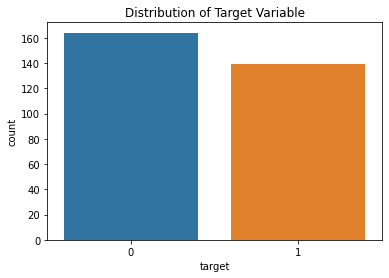

In [24]:
# Data exploration: Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()


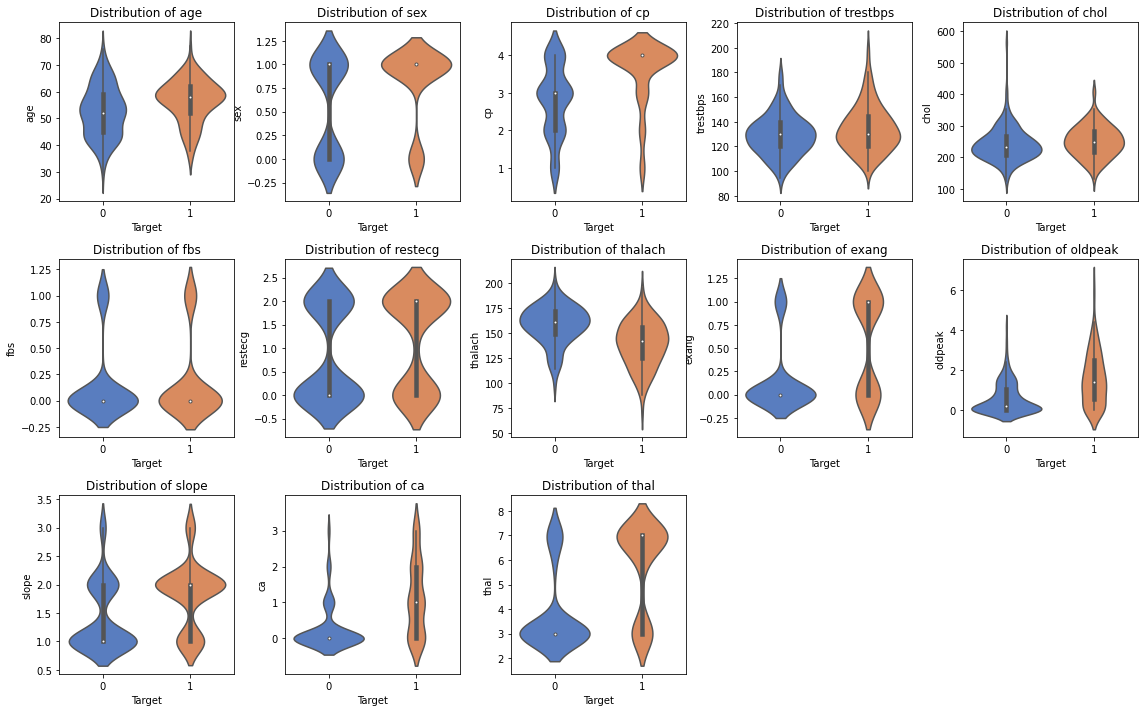

In [25]:
# Violin plot for each feature based on target class
plt.figure(figsize=(16, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(3, 5, i + 1)
    sns.violinplot(x='target', y=feature, data=df, palette='muted', split=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Target')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


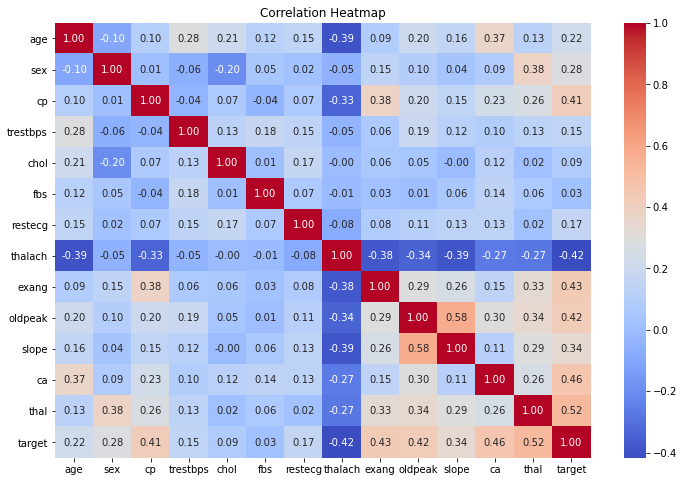

In [26]:
# Visualize the correlation between features with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


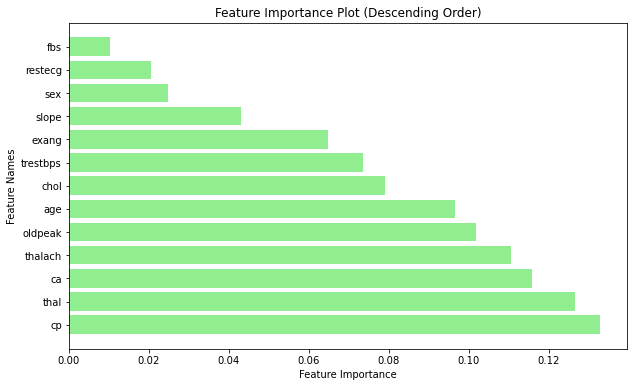

In [27]:
# Train a RandomForestClassifier for feature importance
X = df.drop('target', axis=1)
y = df['target']
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better manipulation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot (Descending Order)')
plt.show()


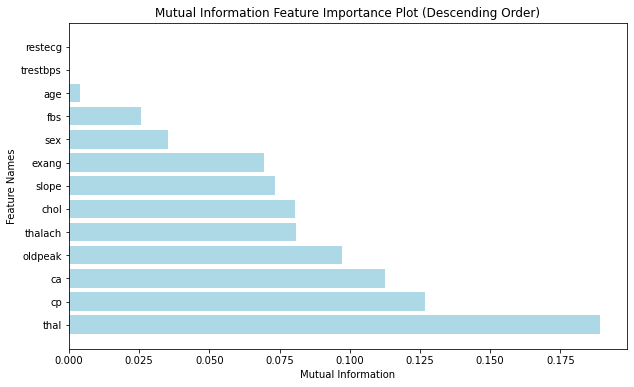

In [28]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores
mutual_info_scores = mutual_info_classif(X, y)

# Create a DataFrame for better manipulation
mutual_info_df = pd.DataFrame({'Feature': feature_names, 'Mutual_Info': mutual_info_scores})

# Sort the DataFrame by Mutual Information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual_Info', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(mutual_info_df['Feature'], mutual_info_df['Mutual_Info'], color='lightblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature Names')
plt.title('Mutual Information Feature Importance Plot (Descending Order)')
plt.show()


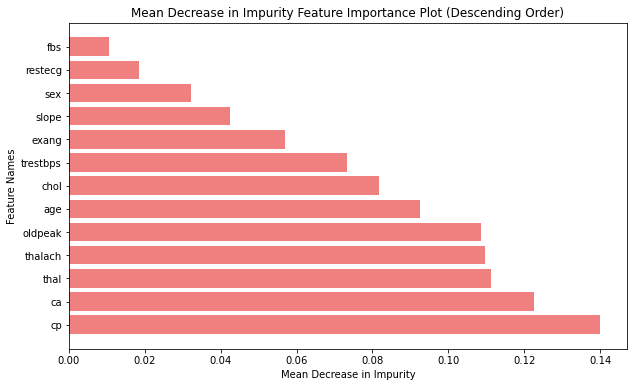

In [29]:
# Train a RandomForestClassifier for Mean Decrease in Impurity
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better manipulation
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightcoral')
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature Names')
plt.title('Mean Decrease in Impurity Feature Importance Plot (Descending Order)')
plt.show()


In [30]:
# Initialize different classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(),
    'NeuralNetwork': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'GaussianProcess': GaussianProcessClassifier(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Ridge': RidgeClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
}

In [31]:
# Create a table to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}


In [32]:
# Use k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through classifiers
for name, model in classifiers.items():
    # Perform k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    # Store results in the table
    results['Model'].append(name)
    results['Accuracy'].append(np.mean(scores))
    results['Precision'].append(np.mean(cross_val_score(model, X, y, cv=kf, scoring='precision')))
    results['Recall'].append(np.mean(cross_val_score(model, X, y, cv=kf, scoring='recall')))
    results['F1'].append(np.mean(cross_val_score(model, X, y, cv=kf, scoring='f1')))


/Users/maxwellhemingway/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maxwellhemingway/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)


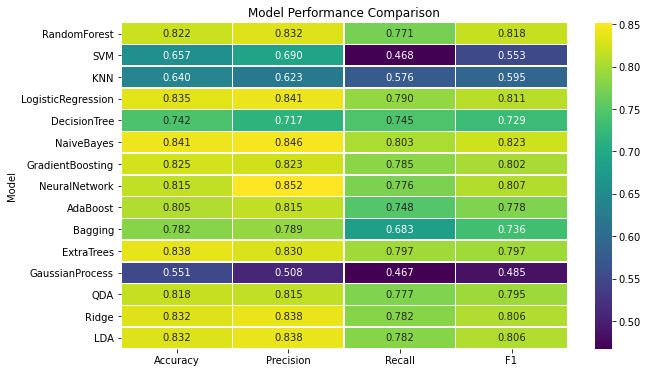

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index('Model'), cmap='viridis', annot=True, fmt=".3f", linewidths=.5)
plt.title('Model Performance Comparison')
plt.show()

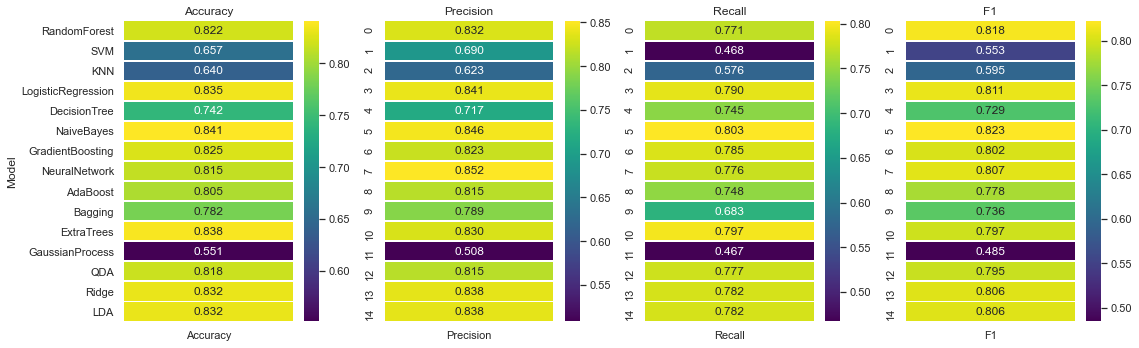

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Plot Accuracy without model names
sns.heatmap(results_df[['Accuracy']].set_index(results_df['Model']).iloc[:, 0].to_frame(), cmap='viridis', annot=True, fmt=".3f", linewidths=.5, ax=axes[0])
axes[0].set_title('Accuracy')


# Plot Precision without model names
sns.heatmap(results_df[['Precision']].iloc[:, 0].to_frame(), cmap='viridis', annot=True, fmt=".3f", linewidths=.5, ax=axes[1])
axes[1].set_title('Precision')

# Plot Recall without model names
sns.heatmap(results_df[['Recall']].iloc[:, 0].to_frame(), cmap='viridis', annot=True, fmt=".3f", linewidths=.5, ax=axes[2])
axes[2].set_title('Recall')

# Plot F1 without model names
sns.heatmap(results_df[['F1']].iloc[:, 0].to_frame(), cmap='viridis', annot=True, fmt=".3f", linewidths=.5, ax=axes[3])
axes[3].set_title('F1')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
# Add a column for the average score for each classifier
results_df['Average'] = results_df.mean(axis=1)


results_df

,Model,Accuracy,Precision,Recall,F1,Average
0,RandomForest,0.821639,0.832106,0.770801,0.817653,0.810550
1,SVM,0.656503,0.689608,0.467801,0.552577,0.591622
2,KNN,0.640000,0.623116,0.575769,0.594591,0.608369
3,LogisticRegression,0.834863,0.840793,0.789660,0.810902,0.819055
4,DecisionTree,0.742459,0.716533,0.744577,0.728679,0.733062
5,NaiveBayes,0.841311,0.845979,0.803429,0.822556,0.828319
6,GradientBoosting,0.824809,0.823308,0.784545,0.801652,0.808578
7,NeuralNetwork,0.814918,0.851794,0.775827,0.806978,0.812379
8,AdaBoost,0.805355,0.815053,0.748250,0.778010,0.786667
9,Bagging,0.781913,0.788869,0.682615,0.735870,0.747317


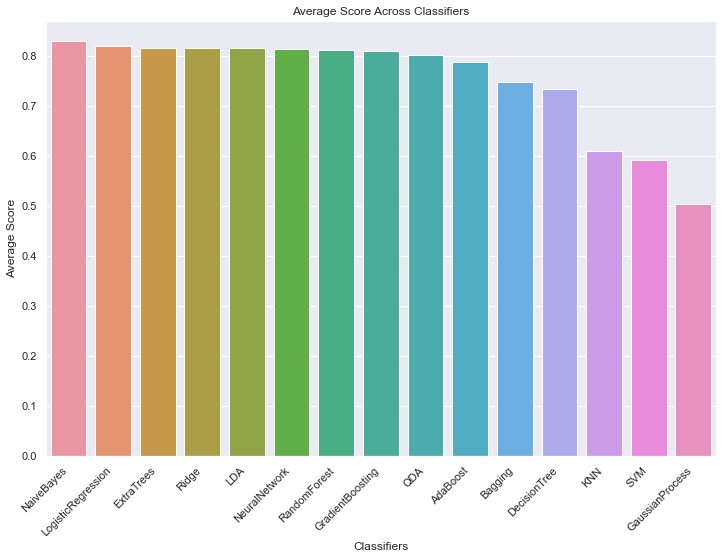

In [37]:
# Sort the DataFrame based on the 'Average' column in descending order
sorted_results = results_df.sort_values(by='Average', ascending=False)

# Set the style for better aesthetics
sns.set(style="darkgrid")

# Create a bar chart for average scores
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='Average', data=sorted_results)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better readability
plt.title('Average Score Across Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Average Score')

plt.show()


In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the DataFrame into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8360655737704918


In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Initialize individual classifiers
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
lr_classifier = LogisticRegression(max_iter=1000)

# Create a voting ensemble classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('rf', rf_classifier),
    ('svm', svm_classifier),
    ('lr', lr_classifier)
], voting='hard')

# Initialize KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(ensemble_classifier, X, y, cv=kfold)

# Print the cross-validation results
print("Cross-Validation Mean Accuracy:", cv_results.mean())
print("Cross-Validation Accuracy Standard Deviation:", cv_results.std())


Cross-Validation Mean Accuracy: 0.8346994535519127
Cross-Validation Accuracy Standard Deviation: 0.04668854505637995


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize individual classifiers
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
lr_classifier = LogisticRegression(max_iter=1000)

# Create a voting ensemble classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('rf', rf_classifier),
    ('svm', svm_classifier),
    ('lr', lr_classifier)
], voting='hard')

# Initialize KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(ensemble_classifier, X_scaled, y, cv=kfold)

# Print the cross-validation results
print("Cross-Validation Mean Accuracy after Normalization:", cv_results.mean())
print("Cross-Validation Accuracy Standard Deviation after Normalization:", cv_results.std())


Cross-Validation Mean Accuracy after Normalization: 0.8380327868852457
Cross-Validation Accuracy Standard Deviation after Normalization: 0.034910891459550585


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/50
7/7 [==============================] - 1s 24ms/step - loss: 0.7029 - accuracy: 0.5130 - val_loss: 0.6594 - val_accuracy: 0.5714
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6369 - accuracy: 0.6839 - val_loss: 0.6160 - val_accuracy: 0.6531
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6248 - accuracy: 0.6684 - val_loss: 0.5848 - val_accuracy: 0.7143
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5690 - accuracy: 0.7617 - val_loss: 0.5591 - val_accuracy: 0.7551
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5453 - accuracy: 0.7927 - val_loss: 0.5376 - val_accuracy: 0.7551
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7927 - val_loss: 0.5211 - val_accuracy: 0.7551
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5298 - accuracy: 0.7668 - val_loss: 0.5079 - val_accuracy: 0.7551
Epoch 8/50
7/7 [=================

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/50
2/2 [==============================] - 1s 130ms/step - loss: 1.1578 - accuracy: 0.3316 - val_loss: 0.7865 - val_accuracy: 0.4082
Epoch 2/50
2/2 [==============================] - 0s 21ms/step - loss: 1.1344 - accuracy: 0.4093 - val_loss: 0.7695 - val_accuracy: 0.3878
Epoch 3/50
2/2 [==============================] - 0s 21ms/step - loss: 1.0437 - accuracy: 0.4249 - val_loss: 0.7541 - val_accuracy: 0.4082
Epoch 4/50
2/2 [==============================] - 0s 22ms/step - loss: 0.9430 - accuracy: 0.4974 - val_loss: 0.7413 - val_accuracy: 0.4286
Epoch 5/50
2/2 [==============================] - 0s 22ms/step - loss: 0.9603 - accuracy: 0.4404 - val_loss: 0.7277 - val_accuracy: 0.4286
Epoch 6/50
2/2 [==============================] - 0s 22ms/step - loss: 0.8670 - accuracy: 0.4870 - val_loss: 0.7152 - val_accuracy: 0.4286
Epoch 7/50
2/2 [==============================] - 0s 22ms/step - loss: 0.8748 - accuracy: 0.4715 - val_loss: 0.7027 - val_accuracy: 0.4694
Epoch 8/50
2/2 [==========

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Split the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters to iterate over
learning_rates = [0.001, 0.01, 0.1]
dropout_rates = [0.3, 0.5]
optimizers = [SGD, Adam, RMSprop]
epochs = [25, 50, 100]
batch_sizes = [64, 128]

best_accuracy = 0
best_model = None

# Loop over hyperparameters
for learning_rate in learning_rates:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            for epoch in epochs:
                for batch_size in batch_sizes:
                    # Define the model architecture
                    model = Sequential([
                        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
                        BatchNormalization(),
                        Dropout(dropout_rate),
                        Dense(32, activation='relu'),
                        BatchNormalization(),
                        Dense(1, activation='sigmoid')
                    ])

                    # Compile the model
                    optimizer_instance = optimizer(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer_instance,
                                  loss='binary_crossentropy',
                                  metrics=['accuracy'])

                    # Train the model
                    history = model.fit(X_train_scaled, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2, verbose=0)

                    # Evaluate the model
                    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

                    # Check if current model has higher accuracy
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_model = model

                    print(f"Learning Rate: {learning_rate}, Dropout Rate: {dropout_rate}, Optimizer: {optimizer}, Epochs: {epoch}, Batch Size: {batch_size}")
                    print("Test Loss:", loss)
                    print("Test Accuracy:", accuracy)

print("Best Model Accuracy:", best_accuracy)



Learning Rate: 0.001, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.sgd.SGD'>, Epochs: 25, Batch Size: 64
Test Loss: 0.6553788781166077
Test Accuracy: 0.6065573692321777
Learning Rate: 0.001, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.sgd.SGD'>, Epochs: 25, Batch Size: 128
Test Loss: 0.7110525369644165
Test Accuracy: 0.4262295067310333
Learning Rate: 0.001, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.sgd.SGD'>, Epochs: 50, Batch Size: 64
Test Loss: 0.6615064144134521
Test Accuracy: 0.688524603843689
Learning Rate: 0.001, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.sgd.SGD'>, Epochs: 50, Batch Size: 128
Test Loss: 0.6344873309135437
Test Accuracy: 0.7049180269241333
Learning Rate: 0.001, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.sgd.SGD'>, Epochs: 100, Batch Size: 64
Test Loss: 0.5719283223152161
Test Accuracy: 0.68852

Learning Rate: 0.01, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.sgd.SGD'>, Epochs: 100, Batch Size: 64
Test Loss: 0.40317612886428833
Test Accuracy: 0.8360655903816223
Learning Rate: 0.01, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.sgd.SGD'>, Epochs: 100, Batch Size: 128
Test Loss: 0.4107814133167267
Test Accuracy: 0.8360655903816223
Learning Rate: 0.01, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, Epochs: 25, Batch Size: 64
Test Loss: 0.4980301856994629
Test Accuracy: 0.8196721076965332
Learning Rate: 0.01, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, Epochs: 25, Batch Size: 128
Test Loss: 0.3892611563205719
Test Accuracy: 0.8360655903816223
Learning Rate: 0.01, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, Epochs: 50, Batch Size: 64
Test Loss: 0.7357351779937744
Test Accuracy: 0.8

Learning Rate: 0.1, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, Epochs: 50, Batch Size: 64
Test Loss: 1.0753625631332397
Test Accuracy: 0.7704917788505554
Learning Rate: 0.1, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, Epochs: 50, Batch Size: 128
Test Loss: 1.4837288856506348
Test Accuracy: 0.8032786846160889
Learning Rate: 0.1, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, Epochs: 100, Batch Size: 64
Test Loss: 1.7503249645233154
Test Accuracy: 0.8032786846160889
Learning Rate: 0.1, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, Epochs: 100, Batch Size: 128
Test Loss: 1.2648627758026123
Test Accuracy: 0.7868852615356445
Learning Rate: 0.1, Dropout Rate: 0.3, Optimizer: <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, Epochs: 25, Batch Size: 64
Test Loss: 1.3288094997406006
Test Accuracy:

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define input layer
inputs = Input(shape=(X_train_scaled.shape[1],))

# Define hidden layers
x = Dense(64, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)

# Define output layer
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
2/2 [==============================] - 1s 141ms/step - loss: 1.0492 - accuracy: 0.3990 - val_loss: 0.7243 - val_accuracy: 0.4490
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 1.0042 - accuracy: 0.4197 - val_loss: 0.7172 - val_accuracy: 0.4490
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 1.0325 - accuracy: 0.3990 - val_loss: 0.7114 - val_accuracy: 0.4694
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.8159 - accuracy: 0.4819 - val_loss: 0.7059 - val_accuracy: 0.4898
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.9028 - accuracy: 0.5026 - val_loss: 0.7001 - val_accuracy: 0.5102
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 0.8478 - accuracy: 0.4767 - val_loss: 0.6957 - val_accuracy: 0.5102
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.8678 - accuracy: 0.5233 - val_loss: 0.6900 - val_accuracy: 0.5306
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 21ms/step - loss: 0.4295 - accuracy: 0.7668 - val_loss: 0.5207 - val_accuracy: 0.7755
Epoch 60/100
2/2 [==============================] - 0s 25ms/step - loss: 0.4355 - accuracy: 0.7772 - val_loss: 0.5185 - val_accuracy: 0.7755
Epoch 61/100
2/2 [==============================] - 0s 28ms/step - loss: 0.4361 - accuracy: 0.7979 - val_loss: 0.5161 - val_accuracy: 0.7755
Epoch 62/100
2/2 [==============================] - 0s 30ms/step - loss: 0.4405 - accuracy: 0.7979 - val_loss: 0.5131 - val_accuracy: 0.7755
Epoch 63/100
2/2 [==============================] - 0s 27ms/step - loss: 0.4416 - accuracy: 0.7720 - val_loss: 0.5112 - val_accuracy: 0.7755
Epoch 64/100
2/2 [==============================] - 0s 28ms/step - loss: 0.4133 - accuracy: 0.8290 - val_loss: 0.5088 - val_accuracy: 0.7755
Epoch 65/100
2/2 [==============================] - 0s 27ms/step - loss: 0.4595 - accuracy: 0.8135 - val_loss: 0.5064 - val_accuracy: 0.7755
Epoch 66/100
2/2 [========

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define input layer
inputs = Input(shape=(X_train_scaled.shape[1],))

# Define hidden layers
shared_layer = Dense(64, activation='relu')  # Shared layer
x = shared_layer(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)

# Define output layer
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/50
2/2 [==============================] - 1s 141ms/step - loss: 0.9031 - accuracy: 0.5026 - val_loss: 0.7464 - val_accuracy: 0.4082
Epoch 2/50
2/2 [==============================] - 0s 22ms/step - loss: 0.8764 - accuracy: 0.4611 - val_loss: 0.7388 - val_accuracy: 0.4490
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 0.7900 - accuracy: 0.5803 - val_loss: 0.7318 - val_accuracy: 0.4694
Epoch 4/50
2/2 [==============================] - 0s 25ms/step - loss: 0.8012 - accuracy: 0.5130 - val_loss: 0.7255 - val_accuracy: 0.4898
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 0.7809 - accuracy: 0.6218 - val_loss: 0.7184 - val_accuracy: 0.5102
Epoch 6/50
2/2 [==============================] - 0s 30ms/step - loss: 0.7431 - accuracy: 0.5855 - val_loss: 0.7142 - val_accuracy: 0.4898
Epoch 7/50
2/2 [==============================] - 0s 31ms/step - loss: 0.7411 - accuracy: 0.5648 - val_loss: 0.7082 - val_accuracy: 0.5102
Epoch 8/50
2/2 [==========

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define input layer
inputs = Input(shape=(X_train_scaled.shape[1],))

# Define hidden layers
x = Dense(64, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)

# Define output layer
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=128, validation_split=0.2, callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/200
2/2 [==============================] - 1s 144ms/step - loss: 0.8009 - accuracy: 0.5440 - val_loss: 0.7406 - val_accuracy: 0.4490 - lr: 0.0100
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 0.7886 - accuracy: 0.5440 - val_loss: 0.7259 - val_accuracy: 0.4490 - lr: 0.0100
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 0.8428 - accuracy: 0.5699 - val_loss: 0.7106 - val_accuracy: 0.4898 - lr: 0.0100
Epoch 4/200
2/2 [==============================] - 0s 24ms/step - loss: 0.7737 - accuracy: 0.5440 - val_loss: 0.6980 - val_accuracy: 0.5306 - lr: 0.0100
Epoch 5/200
2/2 [==============================] - 0s 30ms/step - loss: 0.6561 - accuracy: 0.6477 - val_loss: 0.6869 - val_accuracy: 0.5510 - lr: 0.0100
Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 0.6978 - accuracy: 0.6010 - val_loss: 0.6754 - val_accuracy: 0.5510 - lr: 0.0100
Epoch 7/200
2/2 [==============================] - 0s 30ms/step - loss: 0.6771 - 

2/2 [==============================] - 0s 22ms/step - loss: 0.4843 - accuracy: 0.7876 - val_loss: 0.4853 - val_accuracy: 0.7143 - lr: 0.0100
Epoch 55/200
2/2 [==============================] - 0s 23ms/step - loss: 0.4548 - accuracy: 0.7979 - val_loss: 0.4838 - val_accuracy: 0.7143 - lr: 0.0100
Epoch 56/200
2/2 [==============================] - 0s 22ms/step - loss: 0.4679 - accuracy: 0.8135 - val_loss: 0.4823 - val_accuracy: 0.7143 - lr: 0.0100
Epoch 57/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4041 - accuracy: 0.8135 - val_loss: 0.4809 - val_accuracy: 0.7143 - lr: 0.0100
Epoch 58/200
2/2 [==============================] - 0s 24ms/step - loss: 0.3968 - accuracy: 0.8238 - val_loss: 0.4796 - val_accuracy: 0.7143 - lr: 0.0100
Epoch 59/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4304 - accuracy: 0.7720 - val_loss: 0.4785 - val_accuracy: 0.7143 - lr: 0.0100
Epoch 60/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4558 - accurac

2/2 [==============================] - 0s 24ms/step - loss: 0.4184 - accuracy: 0.7927 - val_loss: 0.4418 - val_accuracy: 0.7347 - lr: 0.0100
Epoch 108/200
2/2 [==============================] - 0s 25ms/step - loss: 0.3676 - accuracy: 0.8342 - val_loss: 0.4416 - val_accuracy: 0.7347 - lr: 0.0100
Epoch 109/200
2/2 [==============================] - 0s 23ms/step - loss: 0.4126 - accuracy: 0.8187 - val_loss: 0.4408 - val_accuracy: 0.7347 - lr: 0.0100
Epoch 110/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3649 - accuracy: 0.8135 - val_loss: 0.4402 - val_accuracy: 0.7347 - lr: 0.0100
Epoch 111/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3636 - accuracy: 0.8394 - val_loss: 0.4394 - val_accuracy: 0.7347 - lr: 0.0100
Epoch 112/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3883 - accuracy: 0.8549 - val_loss: 0.4392 - val_accuracy: 0.7347 - lr: 0.0100
Epoch 113/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3785 - a

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define input layers for each model
input1 = Input(shape=(X_train_scaled.shape[1],))
input2 = Input(shape=(X_train_scaled.shape[1],))

# Define model layers
def create_model(inputs):
    x = Dense(64, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    return Model(inputs=inputs, outputs=x)

# Create models
model1 = create_model(input1)
model2 = create_model(input2)

# Concatenate model outputs
concatenated = tf.keras.layers.Concatenate()([model1.output, model2.output])

# Define output layer
outputs = Dense(1, activation='sigmoid')(concatenated)

# Define the main model
model = Model(inputs=[input1, input2], outputs=outputs)

# Compile the model
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit([X_train_scaled, X_train_scaled], y_train, epochs=200, batch_size=128, validation_split=0.2, callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate([X_test_scaled, X_test_scaled], y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/200
2/2 [==============================] - 1s 188ms/step - loss: 0.9133 - accuracy: 0.5181 - val_loss: 0.7418 - val_accuracy: 0.4694 - lr: 0.0100
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 0.7918 - accuracy: 0.5648 - val_loss: 0.7288 - val_accuracy: 0.4694 - lr: 0.0100
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 0.8211 - accuracy: 0.6010 - val_loss: 0.7159 - val_accuracy: 0.4490 - lr: 0.0100
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 0.7744 - accuracy: 0.5803 - val_loss: 0.7043 - val_accuracy: 0.4694 - lr: 0.0100
Epoch 5/200
2/2 [==============================] - 0s 33ms/step - loss: 0.7556 - accuracy: 0.5751 - val_loss: 0.6922 - val_accuracy: 0.4898 - lr: 0.0100
Epoch 6/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6886 - accuracy: 0.6166 - val_loss: 0.6825 - val_accuracy: 0.5102 - lr: 0.0100
Epoch 7/200
2/2 [==============================] - 0s 35ms/step - loss: 0.7050 - 

2/2 [==============================] - 0s 25ms/step - loss: 0.4497 - accuracy: 0.7876 - val_loss: 0.4850 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 55/200
2/2 [==============================] - 0s 33ms/step - loss: 0.4214 - accuracy: 0.8031 - val_loss: 0.4829 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 56/200
2/2 [==============================] - 0s 32ms/step - loss: 0.4718 - accuracy: 0.7824 - val_loss: 0.4814 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 57/200
2/2 [==============================] - 0s 33ms/step - loss: 0.4593 - accuracy: 0.7876 - val_loss: 0.4797 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 58/200
2/2 [==============================] - 0s 36ms/step - loss: 0.4664 - accuracy: 0.7772 - val_loss: 0.4790 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 59/200
2/2 [==============================] - 0s 34ms/step - loss: 0.4219 - accuracy: 0.8083 - val_loss: 0.4776 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 60/200
2/2 [==============================] - 0s 31ms/step - loss: 0.5123 - accurac

2/2 [==============================] - 0s 23ms/step - loss: 0.3977 - accuracy: 0.8238 - val_loss: 0.4424 - val_accuracy: 0.7755 - lr: 0.0100
Epoch 108/200
2/2 [==============================] - 0s 25ms/step - loss: 0.3755 - accuracy: 0.8238 - val_loss: 0.4421 - val_accuracy: 0.7755 - lr: 0.0100
Epoch 109/200
2/2 [==============================] - 0s 23ms/step - loss: 0.3928 - accuracy: 0.8290 - val_loss: 0.4421 - val_accuracy: 0.7755 - lr: 0.0100
Epoch 110/200
2/2 [==============================] - 0s 24ms/step - loss: 0.3647 - accuracy: 0.8238 - val_loss: 0.4422 - val_accuracy: 0.7755 - lr: 0.0100
Epoch 111/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3816 - accuracy: 0.8446 - val_loss: 0.4418 - val_accuracy: 0.7755 - lr: 0.0100
Epoch 112/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4048 - accuracy: 0.8342 - val_loss: 0.4413 - val_accuracy: 0.7755 - lr: 0.0100
Epoch 113/200
2/2 [==============================] - 0s 31ms/step - loss: 0.3894 - a

In [93]:
pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.2 MB/s eta 0:00:00 0:00:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kerastuner.tuners import GridSearch

# Define input layer
inputs = Input(shape=(X_train_scaled.shape[1],))

# Define hidden layers
def build_model(hp):
    x = Dense(64, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout', 0, 0.5, step=0.1))(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=hp.Choice('optimizer', ['sgd', 'adam']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Define tuner
tuner = GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    directory='grid_search',
    project_name='heart_disease'
)

# Perform hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps)

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Reloading Tuner from grid_search/heart_disease/tuner0.json
Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7fd24cee0d60>
Epoch 1/50
2/2 [==============================] - 1s 187ms/step - loss: 0.8168 - accuracy: 0.4819 - val_loss: 0.7359 - val_accuracy: 0.4286
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 0.7835 - accuracy: 0.4870 - val_loss: 0.7220 - val_accuracy: 0.4286
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 0.7343 - accuracy: 0.5440 - val_loss: 0.7097 - val_accuracy: 0.4490
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 0.6690 - accuracy: 0.6373 - val_loss: 0.6987 - val_accuracy: 0.4694
Epoch 5/50
2/2 [==============================] - 0s 40ms/step - loss: 0.6480 - accuracy: 0.6218 - val_loss: 0.6879 - val_accuracy: 0.4694
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 0.6114 - accuracy: 0.6684 - val_loss: 0.6784 - val_acc

In [107]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps.values)


Best Hyperparameters: {'dropout': 0.1, 'optimizer': 'sgd'}


In [117]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define input layers for each model
input1 = Input(shape=(X_train_scaled.shape[1],))
input2 = Input(shape=(X_train_scaled.shape[1],))

# Define model layers
def create_model(inputs):
    x = Dense(64, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    return Model(inputs=inputs, outputs=x)

# Create models
model1 = create_model(input1)
model2 = create_model(input2)

# Concatenate model outputs
concatenated = tf.keras.layers.Concatenate()([model1.output, model2.output])

# Define output layer
outputs = Dense(1, activation='sigmoid')(concatenated)

# Define the main model
model = Model(inputs=[input1, input2], outputs=outputs)

# Compile the model
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit([X_train_scaled, X_train_scaled], y_train, epochs=200, batch_size=128, validation_split=0.2, 
                    callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate([X_test_scaled, X_test_scaled], y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/200
2/2 [==============================] - 1s 179ms/step - loss: 0.9657 - accuracy: 0.4456 - val_loss: 0.6749 - val_accuracy: 0.5918 - lr: 0.0100
Epoch 2/200
2/2 [==============================] - 0s 28ms/step - loss: 0.8816 - accuracy: 0.4922 - val_loss: 0.6648 - val_accuracy: 0.6122 - lr: 0.0100
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 0.8261 - accuracy: 0.5337 - val_loss: 0.6554 - val_accuracy: 0.6122 - lr: 0.0100
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 0.7968 - accuracy: 0.5492 - val_loss: 0.6463 - val_accuracy: 0.6122 - lr: 0.0100
Epoch 5/200
2/2 [==============================] - 0s 35ms/step - loss: 0.7422 - accuracy: 0.5492 - val_loss: 0.6383 - val_accuracy: 0.6122 - lr: 0.0100
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 0.7074 - accuracy: 0.5907 - val_loss: 0.6307 - val_accuracy: 0.6122 - lr: 0.0100
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6554 - 

2/2 [==============================] - 0s 28ms/step - loss: 0.3682 - accuracy: 0.8446 - val_loss: 0.4666 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 55/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3569 - accuracy: 0.8290 - val_loss: 0.4647 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 56/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3796 - accuracy: 0.8135 - val_loss: 0.4630 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 57/200
2/2 [==============================] - 0s 31ms/step - loss: 0.3813 - accuracy: 0.8290 - val_loss: 0.4613 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 58/200
2/2 [==============================] - 0s 33ms/step - loss: 0.3620 - accuracy: 0.8342 - val_loss: 0.4596 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 59/200
2/2 [==============================] - 0s 30ms/step - loss: 0.3760 - accuracy: 0.8135 - val_loss: 0.4580 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 60/200
2/2 [==============================] - 0s 31ms/step - loss: 0.3520 - accurac

2/2 [==============================] - 0s 31ms/step - loss: 0.2786 - accuracy: 0.8808 - val_loss: 0.4166 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 108/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3001 - accuracy: 0.8653 - val_loss: 0.4167 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 109/200
2/2 [==============================] - 0s 28ms/step - loss: 0.2951 - accuracy: 0.8808 - val_loss: 0.4168 - val_accuracy: 0.7959 - lr: 0.0100
Epoch 110/200
2/2 [==============================] - 0s 30ms/step - loss: 0.2894 - accuracy: 0.8705 - val_loss: 0.4168 - val_accuracy: 0.7959 - lr: 1.0000e-03
Epoch 111/200
2/2 [==============================] - 0s 28ms/step - loss: 0.2875 - accuracy: 0.8653 - val_loss: 0.4167 - val_accuracy: 0.7959 - lr: 1.0000e-03
Epoch 112/200
2/2 [==============================] - 0s 30ms/step - loss: 0.2943 - accuracy: 0.8705 - val_loss: 0.4168 - val_accuracy: 0.7959 - lr: 1.0000e-04
Epoch 113/200
2/2 [==============================] - 0s 27ms/step - loss